**Aprendizado não Supervisionado: agrupamento com k-Means**
---

Neste exemplo, a aplicação do algoritmo de agrupamento k-Means é feita sobre uma **lista de pontos**. Usamos o pacote KMeans do sklearn na implementação.

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Criando a lista de pontos a ser clusterizada.

In [ ]:
# Usando pontos como exemplo
x1 = [3, 3, -5, -6, -5, 3, 4, 3, 5, -6, 4, 5, -4, -4, 5, -4, 5, 3, 2, 2, 3]
x2 = [3, 4, -5,  4,  4,-5, 4,-5,-6, -4, 5, 6,  6,  7,-3,  4, -5,6, 7,-5, 6]

X = []
for i in range(0,len(x1)):
  X.append([x1[i],x2[i]])
print("Lista de pontos:\n", X , "\n")

Lista de pontos:
 [[3, 3], [3, 4], [-5, -5], [-6, 4], [-5, 4], [3, -5], [4, 4], [3, -5], [5, -6], [-6, -4], [4, 5], [5, 6], [-4, 6], [-4, 7], [5, -3], [-4, 4], [5, -5], [3, 6], [2, 7], [2, -5], [3, 6]] 



Criamos também uma visualização para que você consiga ver os clusters esperados. A partir dessa visualização, conseguimos inspecionar e verificar a qualidade dos métodos usados para estimar o valor k, bem como, do próprio algoritmo k-Means.

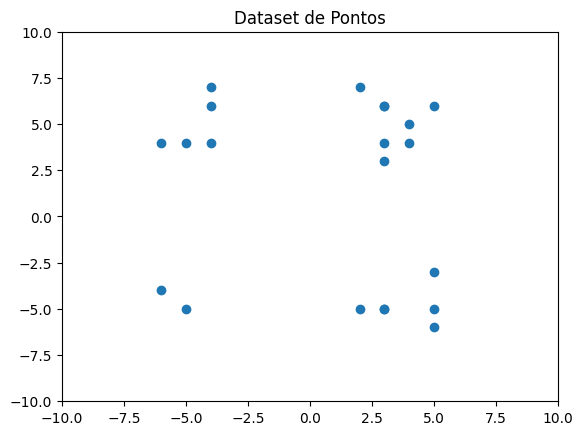

In [ ]:
# Visualizacao dos dados
plt.plot()
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title('Dataset de Pontos')
plt.scatter(x1, x2)
plt.show()

**Métodos para estimar o valor de k**

A ideia é testar vários valores para k e medir:
*   **Distorção**: mede a coesão dos clusters. Calcula a distância dos pontos de cada cluster até o seu centróide.
*   **Inércia**: mede a distância dos pontos até o centróide mais próximo

In [ ]:
#Distorcao: Calcula a distancia dos pontos de cada cluster ate seu centroide
distortions = []
#Inercia: distancia dos dados ate o centroide mais proximos
inertias = []

mapping1 = {}
mapping2 = {}

#Testando valores de 2 a 10
K = range(2, 11)

for k in K:
    # Executando o k-Means para cada valor de k
    kmeanModel = KMeans(n_clusters=k,n_init='auto')
    kmeanModel.fit(X)

    #Calcula a distancia de cada ponto de X ao centroide
    distancias = cdist(X, kmeanModel.cluster_centers_,'euclidean')
    #print(" k = " , k, "Distancias: ", distancias)

    soma = 0
    for item in distancias:
      soma = soma + min(item)
    coesao = soma/len(distancias)

    distortions.append(coesao)
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = coesao
    mapping2[k] = kmeanModel.inertia_

Valores resultantes para Distorção:

In [ ]:
#Avaliando a saida da distorcao
print(f'{"k"} : {"Distorção"}')
for key, val in mapping1.items():
    print(f'{key} : {val}')

k : Distorção
2 : 3.858794179114269
3 : 2.279109183176181
4 : 1.3579483504733343
5 : 1.2353561311303465
6 : 0.9725514611829438
7 : 0.8262906929806604
8 : 0.6626774562414505
9 : 0.6150584086224027
10 : 0.504537213555307


Plotando em um gráfico, visando a aplicação do **método do Cotovelo**, cada valor de k e o valor correspondente de **Distorção**. Nesse método, o local onde se formar o cotovelo, define o valor de k. No exemplo, o valor estimado é 4.

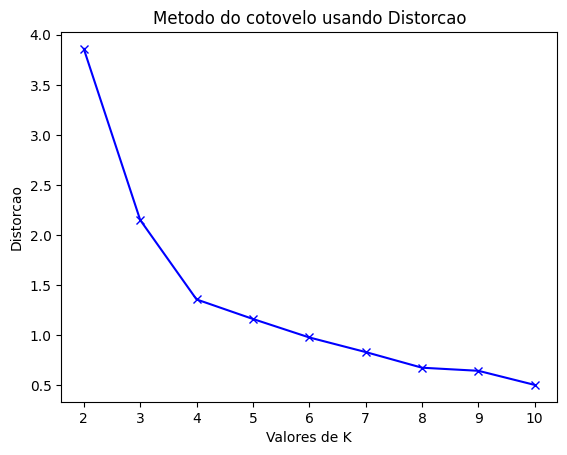

In [ ]:
#Exibindo os dados em um grafico
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorcao')
plt.title('Metodo do cotovelo usando Distorcao')
plt.show()

Valores encontrados para a Inércia:

In [ ]:
#Avaliando a saida da inercia
print(f'{"k"} : {"Inércia"}')
for key, val in mapping2.items():
    print(f'{key} : {val}')

k : Inércia
2 : 371.1923076923077
3 : 174.70238095238096
4 : 44.616666666666674
5 : 38.43809523809524
6 : 27.583333333333332
7 : 20.25
8 : 13.166666666666668
9 : 11.666666666666668
10 : 7.333333333333334


Plotando em um gráfico, visando a aplicação do **método do Cotovelo**, cada valor de k e o correspondente de **Inércia**. Nesse método, o local onde se formar o cotovelo, define o valor de k. No exemplo, o valor estimado é 4.

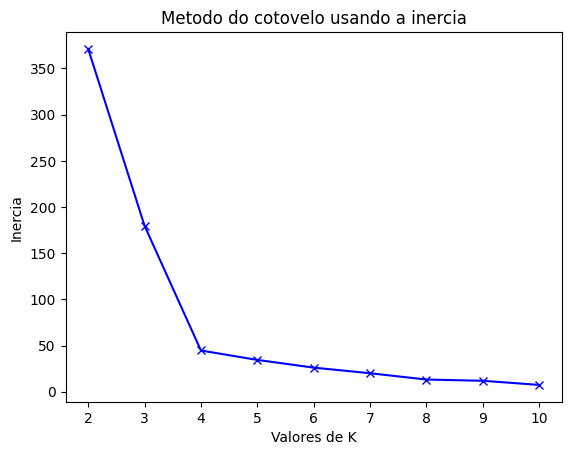

In [ ]:
#Exibindo o grafico da inercia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inercia')
plt.title('Metodo do cotovelo usando a inercia')
plt.show()

Outra estratégia é a medida Silhoutte.

In [ ]:
#Testando silhoutte
medidas = []
for k in K:
    # Executando o k-Means para cada valor de k
    kmeanModel = KMeans(n_clusters=k,n_init='auto')
    preds = kmeanModel.fit_predict(X)
    score = silhouette_score(X, preds)
    medidas.append(score)
    print('Silhuette para ' + str(k) + ' clusters : ' + str(score))

Silhuette para 2 clusters : 0.5393061269948122
Silhuette para 3 clusters : 0.6332323562358754
Silhuette para 4 clusters : 0.7510890394935503
Silhuette para 5 clusters : 0.6140093388034682
Silhuette para 6 clusters : 0.5841550255316325
Silhuette para 7 clusters : 0.45115748691513746
Silhuette para 8 clusters : 0.5226452444045057
Silhuette para 9 clusters : 0.4817659311084078
Silhuette para 10 clusters : 0.5436375889220498


Gráfico dos diferentes valores de k para a medida Silhoute.

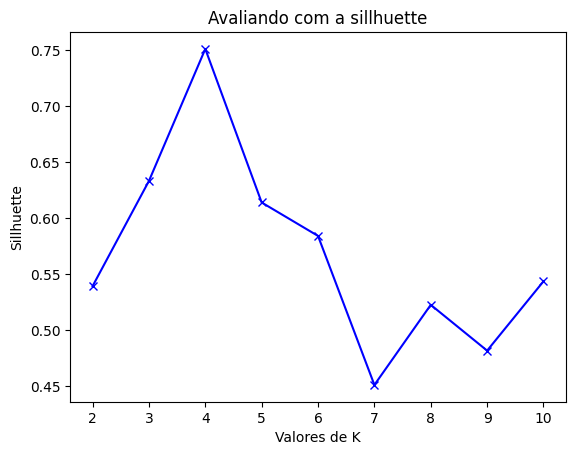

In [ ]:
#Exibindo o grafico da sillhuette
plt.plot(K, medidas, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Sillhuette')
plt.title('Avaliando com a sillhuette')
plt.show()

Após a aplicação dos métodos, definimos o k como 4, e aplicamos novamente o k-Means para este valor de k. São exibidos os valores dos centróides e os labels atribuídos aos dados.

In [ ]:
#Visualizacao centroides e distribuicao dos dados
k = 4
kmeanModel = KMeans(n_clusters=k,n_init='auto')
kmeanModel.fit(X)
C = kmeanModel.cluster_centers_
labels = kmeanModel.labels_
print("Centroides:\n", C)
print("Cluster de cada cada:\n", labels)

Centroides:
 [[-4.6         5.        ]
 [ 3.83333333 -4.83333333]
 [ 3.375       5.125     ]
 [-5.5        -4.5       ]]
Cluster de cada cada:
 [2 2 3 0 0 1 2 1 1 3 2 2 0 0 1 0 1 2 2 1 2]


Nessa saída, exibidos os agrupamentos e centróides para k=4.

In [ ]:
for iCluster in range(0, k):
  print("Cluster: ", iCluster)
  print("Centroide: ", C[iCluster])
  for indice in range(0, len(labels)):
    if(iCluster==labels[indice]):
      print(X[indice])

Cluster:  0
Centroide:  [-4.6  5. ]
[-6, 4]
[-5, 4]
[-4, 6]
[-4, 7]
[-4, 4]
Cluster:  1
Centroide:  [ 3.83333333 -4.83333333]
[3, -5]
[3, -5]
[5, -6]
[5, -3]
[5, -5]
[2, -5]
Cluster:  2
Centroide:  [3.375 5.125]
[3, 3]
[3, 4]
[4, 4]
[4, 5]
[5, 6]
[3, 6]
[2, 7]
[3, 6]
Cluster:  3
Centroide:  [-5.5 -4.5]
[-5, -5]
[-6, -4]


Visualização dos clusters e seus centróides. Podemos notar que o algoritmo encontra os clusters adequadamente para este conjunto de dados.

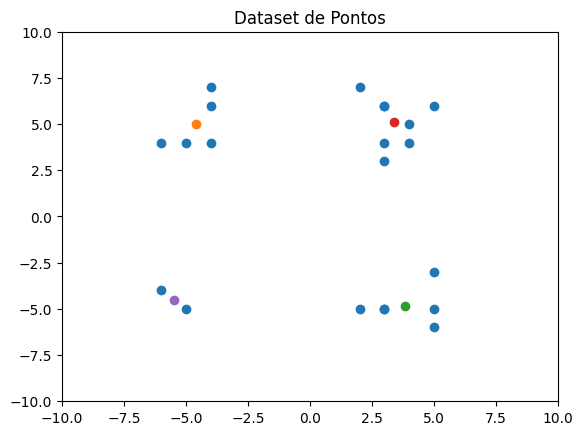

In [ ]:
# Visualizacao dos dados
plt.plot()
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title('Dataset de Pontos')
plt.scatter(x1, x2)
plt.scatter(C[0][0],C[0][1])
plt.scatter(C[1][0],C[1][1])
plt.scatter(C[2][0],C[2][1])
plt.scatter(C[3][0],C[3][1])
plt.show()